In [1]:
# cartesian

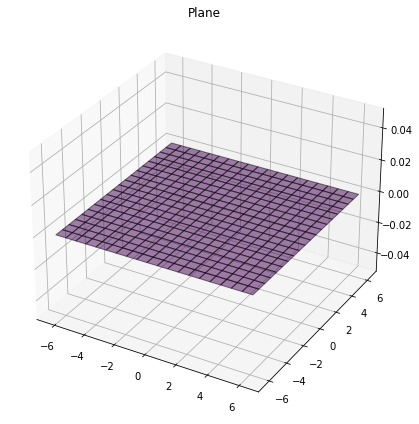

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the functions for the plane
def plane(point):
    x, y = point
    return x, y, 0

x_vals = np.linspace(-2 * np.pi, 2 * np.pi, 20)
y_vals = np.linspace(-2 * np.pi, 2 * np.pi, 20)
X, Y = np.meshgrid(x_vals, y_vals)

# Calculate points on the plane
X_plane = X
Y_plane = Y
Z_plane = np.zeros_like(X)

# Create a subplot for the plane
fig = plt.figure(figsize=(6, 6))
ax1 = fig.add_subplot(111, projection='3d')
plane_surface = ax1.plot_surface(X_plane, Y_plane, Z_plane, cmap='viridis', alpha=0.5, edgecolor='black')  # Set color and edgecolor
ax1.set_title('Plane')

plt.tight_layout()
plt.show()


In [3]:
# projective 

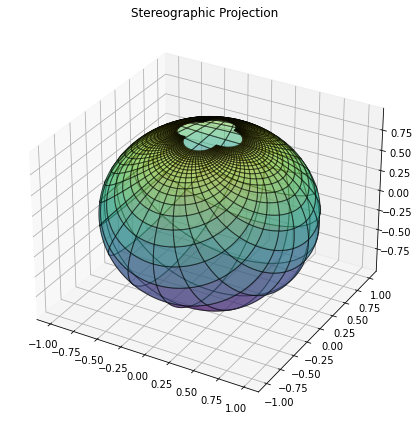

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the functions for the stereographic projection
def stereo(point):
    x, y = point
    return (
        (2 * x) / (1 + x ** 2 + y ** 2),
        (2 * y) / (1 + x ** 2 + y ** 2),
        (-1 + x ** 2 + y ** 2) / (1 + x ** 2 + y ** 2)
    )

x_vals = np.linspace(-2 * np.pi, 2 * np.pi, 500)
y_vals = np.linspace(-2 * np.pi, 2 * np.pi, 500)
X, Y = np.meshgrid(x_vals, y_vals)

# Calculate stereographic projection
X_stereo = np.zeros_like(X)
Y_stereo = np.zeros_like(Y)
Z_stereo = np.zeros_like(X)
for i in range(len(x_vals)):
    for j in range(len(y_vals)):
        X_stereo[i, j], Y_stereo[i, j], Z_stereo[i, j] = stereo([X[i, j], Y[i, j]])

# Create a subplot for the stereographic projection
fig = plt.figure(figsize=(6, 6))
ax2 = fig.add_subplot(111, projection='3d')
stereo_surface = ax2.plot_surface(X_stereo, Y_stereo, Z_stereo, cmap='viridis', alpha=0.5, edgecolor='black')  # Set color and edgecolor
ax2.set_title('Stereographic Projection')

plt.tight_layout()
plt.show()


In [5]:
# unit circle

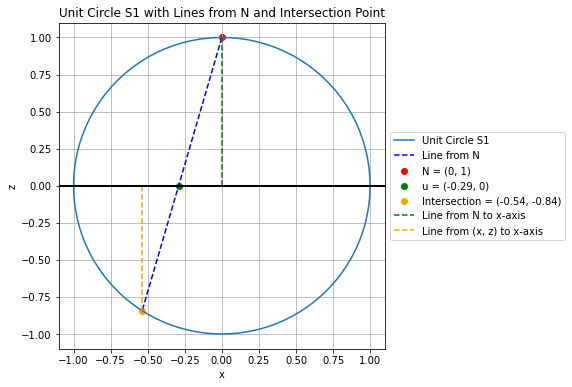

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Create theta values for the circle
theta = np.linspace(0, 2 * np.pi, 100)
x_circle = np.cos(theta)
z_circle = np.sin(theta)

# Highlight the point N = (0, 1)
N_x = 0
N_z = 1

# Generate a random angle theta for point B on the circle
theta_B = np.random.uniform(0, 2 * np.pi)

# Calculate the coordinates of point B on the unit circle
x_B = np.cos(theta_B)
z_B = np.sin(theta_B)

# Calculate u using the given x-coordinate
u = x_B / (1 - z_B)

# Plotting
plt.figure(figsize=(6, 6))
plt.plot(x_circle, z_circle, label='Unit Circle S1')
if u > 1 or u < -1:
    plt.plot([0, u], [1, 0], color='blue', linestyle='--', label='Line from N')
else:
    plt.plot([N_x, x_B], [N_z, z_B], color='blue', linestyle='--', label='Line from N') 
plt.scatter(N_x, N_z, color='red', label='N = (0, 1)')
plt.scatter([u], [0], color='green', label=f'u = ({u:.2f}, 0)')
plt.scatter(x_B, z_B, color='orange', label=f'Intersection = ({x_B:.2f}, {z_B:.2f})')
plt.plot([N_x, N_x], [N_z, 0], color='green', linestyle='--', label='Line from N to x-axis')  # Line from N to x-axis
plt.plot([x_B, x_B], [z_B, 0], color='orange', linestyle='--', label='Line from (x, z) to x-axis')  # Line from (x, z) to x-axis

# Highlight the x-axis
plt.axhline(y=0, color='black', linewidth=2)

# Set labels and title
plt.xlabel('x')
plt.ylabel('z')
plt.title('Unit Circle S1 with Lines from N and Intersection Point')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.grid(True)

# Set axis aspect ratio to be equal
plt.gca().set_aspect('equal', adjustable='box')

# Show the plot
plt.show()


In [7]:
# Elliptic Curves

In [44]:
import math

# Given points P and Q
x_P = -3
x_Q = 5
a = 1
b = 4

def solve_y(x, a, b):
    return math.sqrt(abs(x**3 - a*x + b))

def slope(x1, y1, x2, y2):
    return (y2 - y1) / (x2 - x1)

def third_point(m, x1, x2):
    return m**2 - x1 - x2

y_P = solve_y(x_P, a, b)
y_Q = solve_y(x_Q, a, b)

print("y_P:", y_P)
print("y_Q:", y_Q)

m = slope(x_P, y_P, x_Q, y_Q)
print("Slope (m):", m)

x_R = third_point(m, x_P, x_Q)
print("x_R:", x_R)

y_R = solve_y(x_R, a, b)
print("y_R:", y_R)


y_P: 4.47213595499958
y_Q: 11.135528725660043
Slope (m): 0.8329240963325579
x_R: -1.3062374497485916
y_R: 1.7542695358213516


In [45]:
def plot_elliptic_curve(elliptic_curve_points):
    # Separate x and y coordinates from the points
    x_coords, y_coords = zip(*elliptic_curve_points)

    # Create a scatter plot for the elliptic curve points
    plt.scatter(x_coords, y_coords, color='b', marker='o', label='Elliptic Curve Points')

    # Plot the points to be added with different colors or markers
#     plt.scatter(points_to_add[0][0], points_to_add[0][1], color='r', marker='o', s=100, label='Point (9, 16)')
    
    # Add labels and title
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.title('Elliptic Curve Points')

    # Move the legend to the right of the graph and adjust its position
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

    # Show the plot
    plt.grid(True)
    plt.show()
    
def is_quadratic_residue(z, p):
    return pow(z, (p-1)//2, p) == 1

def points_on_elliptic_curve(p, b):
    points_on_curve = []
    for x in range(p):
        z = (x**3 + x + b) % p
        if z == 0:
            points_on_curve.append((x, 0))
        elif is_quadratic_residue(z, p):
            y = pow(z, (p+1)//4, p)  # Calculate the square root modulo p
            points_on_curve.append((x, y))
            points_on_curve.append((x, p - y))  # Also add the negation of the square root
    return points_on_curve

def is_non_singular(a, b, p):
    # Calculate 4a^3 + 27b^2
    value = (4 * pow(a, 3, p) + 27 * pow(b, 2, p)) % p
    return value != 0
def quadratic_residues(modulo):
    residues = set()
    for x in range(modulo):
        residue = (x * x) % modulo
        residues.add(residue)
    return residues


In [46]:
# Point addition function
def point_addition(p1, p2):
    if p1 is None:
        return p2
    if p2 is None:
        return p1

    x1, y1 = p1
    x2, y2 = p2

    if p1 != p2:
        lambda_ = ((y2 - y1) * pow(x2 - x1, -1, p)) % p
    else:
        lambda_ = ((3 * x1**2 + a) * pow(2 * y1, -1, p)) % p

    x3 = (lambda_**2 - x1 - x2) % p
    y3 = (lambda_ * (x1 - x3) - y1) % p

    return (x3, y3)

def negate_point(point, p):
    x, y = point
    return x, (-y % p)

# Point doubling function
def point_doubling(p):
    return point_addition(p, p)

# Point multiplication function
def point_multiplication(m, point):
    result = None
    current = point
    while m > 0:
        if m & 1:
            result = point_addition(result, current)
        current = point_doubling(current)
        m >>= 1
    return result

In [47]:
p = 127

# Check if the curve is non-singular
result = is_non_singular(a, b, p)
print(f"The curve y^2 ≡ x^3 + {a}x + {b} (mod {p}) is non-singular: {result}")

residues = quadratic_residues(p)
print(f"Quadratic residues in Z{p}: {residues}")

elliptic_curve_points = points_on_elliptic_curve(p, b)
print("Point count:", len(elliptic_curve_points) + 1)

print(f"Points on the elliptic curve E (y^2 = x^3 + {a}x + {b}) defined over Z{p}:")
print(", ".join(map(str, elliptic_curve_points)), ', infinity')

The curve y^2 ≡ x^3 + 1x + 4 (mod 127) is non-singular: True
Quadratic residues in Z127: {0, 1, 2, 4, 8, 9, 11, 13, 15, 16, 17, 18, 19, 21, 22, 25, 26, 30, 31, 32, 34, 35, 36, 37, 38, 41, 42, 44, 47, 49, 50, 52, 60, 61, 62, 64, 68, 69, 70, 71, 72, 73, 74, 76, 79, 81, 82, 84, 87, 88, 94, 98, 99, 100, 103, 104, 107, 113, 115, 117, 120, 121, 122, 124}
Point count: 123
Points on the elliptic curve E (y^2 = x^3 + 1x + 4) defined over Z127:
(0, 2), (0, 125), (3, 62), (3, 65), (4, 31), (4, 96), (6, 37), (6, 90), (7, 117), (7, 10), (8, 4), (8, 123), (9, 19), (9, 108), (11, 87), (11, 40), (16, 68), (16, 59), (21, 74), (21, 53), (23, 16), (23, 111), (24, 124), (24, 3), (28, 34), (28, 93), (29, 61), (29, 66), (32, 61), (32, 66), (34, 37), (34, 90), (35, 49), (35, 78), (36, 50), (36, 77), (37, 104), (37, 23), (38, 47), (38, 80), (40, 121), (40, 6), (43, 68), (43, 59), (44, 74), (44, 53), (45, 49), (45, 78), (46, 72), (46, 55), (47, 49), (47, 78), (49, 117), (49, 10), (54, 13), (54, 114), (55, 8), 

In [48]:
P = (4, 31)
Q = (40, 6)
T = point_addition(P, Q)
R = negate_point(point_addition(P, Q), p)

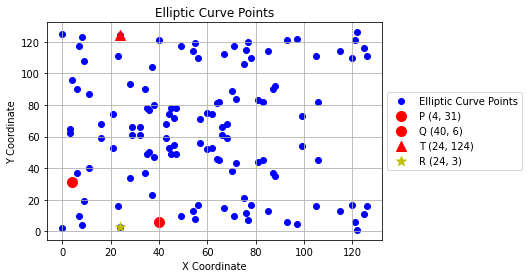

In [49]:
import matplotlib.pyplot as plt

# Separate x and y coordinates from the points
x_coords, y_coords = zip(*elliptic_curve_points)

# Create a scatter plot
plt.scatter(x_coords, y_coords, color='b', marker='o', label='Elliptic Curve Points')

# Plot the points to be added with different colors or markers
plt.scatter(P[0], P[1], color='r', marker='o', s=100, label='P (4, 31)')
plt.scatter(Q[0], Q[1], color='r', marker='o', s=100, label='Q (40, 6)')
plt.scatter(T[0], T[1], color='r', marker='^', s=100, label='T (24, 124)')
plt.scatter(R[0], R[1], color='y', marker='*', s=100, label='R (24, 3)')


# Add labels and title
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('Elliptic Curve Points')

# Move the legend to the right of the graph and adjust its position
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Show the plot
plt.grid(True)
plt.show()


In [14]:
# EL GAMMAL PRIMITIVE ROOT

In [15]:
def gcd(a, b):
    while b:
        a, b = b, a % b
    return a

def totient(p):
    count = 0
    for i in range(1, p):
        if gcd(i, p) == 1:
            count += 1
    return count

def is_primitive_root(g, p):
    phi_p = totient(p)
    residues = set()
    for i in range(1, phi_p + 1):
        power_mod = pow(g, i, p)
        residues.add(power_mod)
        print(f"{g}^{i} ≡ {power_mod} (mod {p})")
    
    if len(residues) == phi_p:
        print(f"{g} is a primitive root modulo {p}")
        return True
    else:
        print(f"{g} is not a primitive root modulo {p}")
        return False

# Example usage:
prime_number = 101
candidate = 7
is_primitive_root(candidate, prime_number)


7^1 ≡ 7 (mod 101)
7^2 ≡ 49 (mod 101)
7^3 ≡ 40 (mod 101)
7^4 ≡ 78 (mod 101)
7^5 ≡ 41 (mod 101)
7^6 ≡ 85 (mod 101)
7^7 ≡ 90 (mod 101)
7^8 ≡ 24 (mod 101)
7^9 ≡ 67 (mod 101)
7^10 ≡ 65 (mod 101)
7^11 ≡ 51 (mod 101)
7^12 ≡ 54 (mod 101)
7^13 ≡ 75 (mod 101)
7^14 ≡ 20 (mod 101)
7^15 ≡ 39 (mod 101)
7^16 ≡ 71 (mod 101)
7^17 ≡ 93 (mod 101)
7^18 ≡ 45 (mod 101)
7^19 ≡ 12 (mod 101)
7^20 ≡ 84 (mod 101)
7^21 ≡ 83 (mod 101)
7^22 ≡ 76 (mod 101)
7^23 ≡ 27 (mod 101)
7^24 ≡ 88 (mod 101)
7^25 ≡ 10 (mod 101)
7^26 ≡ 70 (mod 101)
7^27 ≡ 86 (mod 101)
7^28 ≡ 97 (mod 101)
7^29 ≡ 73 (mod 101)
7^30 ≡ 6 (mod 101)
7^31 ≡ 42 (mod 101)
7^32 ≡ 92 (mod 101)
7^33 ≡ 38 (mod 101)
7^34 ≡ 64 (mod 101)
7^35 ≡ 44 (mod 101)
7^36 ≡ 5 (mod 101)
7^37 ≡ 35 (mod 101)
7^38 ≡ 43 (mod 101)
7^39 ≡ 99 (mod 101)
7^40 ≡ 87 (mod 101)
7^41 ≡ 3 (mod 101)
7^42 ≡ 21 (mod 101)
7^43 ≡ 46 (mod 101)
7^44 ≡ 19 (mod 101)
7^45 ≡ 32 (mod 101)
7^46 ≡ 22 (mod 101)
7^47 ≡ 53 (mod 101)
7^48 ≡ 68 (mod 101)
7^49 ≡ 72 (mod 101)
7^50 ≡ 100 (mod 101)
7^51 ≡ 94 (m

True

In [16]:
def gcd(a, b):
    while b:
        a, b = b, a % b
    return a

def totient(p):
    count = 0
    for i in range(1, p):
        if gcd(i, p) == 1:
            count += 1
    return count

def factorize(n):
    factors = []
    d = 2
    while d * d <= n:
        while (n % d) == 0:
            factors.append(d)
            n //= d
        d += 1
    if n > 1:
        factors.append(n)
    return factors

def is_primitive_root(g, p):
    phi_p = totient(p)
    for prime_factor in set(factorize(phi_p)):
        exp = phi_p // prime_factor
        congruence = pow(g, exp, p)
        print(f"{g}^{exp} = {g**exp}, {g**exp}(mod {p}) = {congruence}, so {g}^{exp} ≡ {congruence}")
        if congruence == 1:
            return False
    print(f"{g} is a primitive root modulo {p}")
    print(f"A primitive root modulo {p} is: {g}")
    return True

def find_primitive_root(p):
    for g in range(2, p):
        if is_primitive_root(g, p):
            return g
    return None

# Example usage:
prime_number = 41
primitive_root = find_primitive_root(prime_number)


2^20 = 1048576, 1048576(mod 41) = 1, so 2^20 ≡ 1
3^20 = 3486784401, 3486784401(mod 41) = 40, so 3^20 ≡ 40
3^8 = 6561, 6561(mod 41) = 1, so 3^8 ≡ 1
4^20 = 1099511627776, 1099511627776(mod 41) = 1, so 4^20 ≡ 1
5^20 = 95367431640625, 95367431640625(mod 41) = 1, so 5^20 ≡ 1
6^20 = 3656158440062976, 3656158440062976(mod 41) = 40, so 6^20 ≡ 40
6^8 = 1679616, 1679616(mod 41) = 10, so 6^8 ≡ 10
6 is a primitive root modulo 41
A primitive root modulo 41 is: 6


In [17]:
# EL GAMMAL ENCRYPTION

In [18]:
# Encoding function
def getNum(message):
    mapping = {chr(65 + i): i for i in range(26)}  # A=0, B=1,...,Z=25
    encoded = []

    for char in message:
        if char in mapping:
            encoded.append(mapping[char])
        else:
            raise ValueError("Character not in mapping")

    return encoded

def getChar(message):
    mapping = {i: chr(65 + i) for i in range(26)}  # A=0, B=1,...,Z=25
    decoded = ''

    while message > 0:
        letter_value = message % 26
        message = (message - letter_value) // 26
        decoded = mapping[letter_value] + decoded

    return decoded

In [19]:
# Message to encode and encrypt
message = "HELLO"

# Encode the message
encoded_message = getNum(message)
print(encoded_message)

[7, 4, 11, 11, 14]


In [20]:
def calculate_header(g, r, p):
    return pow(g, r, p)

def encrypt(x, a_beta, b_prkey, p):
    return (x * pow(a_beta, b_prkey, p)) % p

def decrypt_message(b_beta, t, a_prkey, p):
    return (t * pow(b_beta, p - 1 - a_prkey, p)) % p

def find_inverse(a, p):
    # Extended Euclidean Algorithm to find the inverse
    t1, t2 = 0, 1
    r1, r2 = p, a

    while r2 != 0:
        quotient = r1 // r2
        t1, t2 = t2, t1 - quotient * t2
        r1, r2 = r2, r1 - quotient * r2

    if r1 > 1:
        raise ValueError("a is not invertible")
    if t1 < 0:
        t1 += p

    return t1

def decrypt(ciphertext, p, a_prkey):
    r, t = ciphertext
    s = pow(r, a_prkey, p)
    s_inv = find_inverse(s, p)
    plaintext = (t * s_inv) % p

    return plaintext

In [21]:
# Given values
p = 101
alpha = 7

# ALICE'S STUFF
a_prkey = 17
a_beta = calculate_header(alpha, a_prkey, p)
print(f"Alice's header (beta): {a_beta}")

# BOB'S STUFF
b_prkey = 13
b_beta = calculate_header(alpha, b_prkey, p)
print(f"Bob's header (beta): {b_beta}")

# Encrypt messages
encrypted = []
for x in encoded_message:
    encrypted.append((b_beta, encrypt(x, a_beta, b_prkey, p)))

print("Encrypted messages:", encrypted)

# ALICE:
decrypted_message = []
decoded = []
for ciphertext in encrypted:
    decrypted = decrypt(ciphertext, p, a_prkey)
    decrypted_message.append(decrypted)
    decoded.append(chr(decrypted + 65))

print("Decrypted messages:", decrypted_message)
print("Decoded characters:", decoded)


Alice's header (beta): 93
Bob's header (beta): 75
Encrypted messages: [(75, 76), (75, 29), (75, 4), (75, 4), (75, 51)]
Decrypted messages: [7, 4, 11, 11, 14]
Decoded characters: ['H', 'E', 'L', 'L', 'O']


In [22]:
# ELLIPTIC CURVES

In [23]:
def is_quadratic_residue(a, m):
    # Check if a is a quadratic residue modulo m
    for x in range(m):
        if (x * x) % m == a:
            return True
    return False

def find_quadratic_residues(m):
    # Find the quadratic residues modulo m
    quadratic_residues = []
    for a in range(m):
        if is_quadratic_residue(a, m):
            quadratic_residues.append(a)
    return quadratic_residues

# Example: Find the quadratic residues modulo 13
m = 13
quadratic_residues_mod_13 = find_quadratic_residues(m)

# Output a message for each iteration
for a in range(m):
    if a in quadratic_residues_mod_13:
        print(f"When x: {a}, x^2 mod {m} = {a}^2 mod {m} = {a}")


When x: 0, x^2 mod 13 = 0^2 mod 13 = 0
When x: 1, x^2 mod 13 = 1^2 mod 13 = 1
When x: 3, x^2 mod 13 = 3^2 mod 13 = 3
When x: 4, x^2 mod 13 = 4^2 mod 13 = 4
When x: 9, x^2 mod 13 = 9^2 mod 13 = 9
When x: 10, x^2 mod 13 = 10^2 mod 13 = 10
When x: 12, x^2 mod 13 = 12^2 mod 13 = 12


In [24]:
# encoding scheme

In [25]:
def modular_sqrt(a, p):
    for x in range(p):
        if x * x % p == a:
            return x
    return None

# Encode a message
def ecc_encode(message):
    x = k * message
    y_squared = (x ** 3 + a * x + b) % p
    y = modular_sqrt(y_squared, p)
    if y is None:
        print(y, p)
        raise ValueError("No square root found for y^2 modulo p")
    return (x, y)

# Calculate y-coordinate for a given x-coordinate using the elliptic curve equation
def calculate_y(x):
    y_squared = (x ** 3 + a * x + b) % p
    y = modular_sqrt(y_squared, p)
    if y is None:
        return None
    return y


In [30]:
# Message to encode and encrypt
char_message = "HELP"

# Encode the message
message = getNum(char_message)
print(message)

[7, 4, 11, 15]


In [31]:
# Constant for encoding
k = 30

encoded_points = []
for item in message:
    encoded_point = ecc_encode(item)
    print(f"Encoded point for message {item}: {encoded_point}")
    encoded_points.append(encoded_point)

    for j in range(2, 10000):  # Calculate the first 10 pairs in the series
        x = k * item + j
        y = calculate_y(x)
        if y != None:
            print(f"For j = {j}, x = {x}, y = {y}")
            break

Encoded point for message 7: (210, 39)
For j = 2, x = 212, y = 35
Encoded point for message 4: (120, 18)
For j = 2, x = 122, y = 15
Encoded point for message 11: (330, 35)
For j = 2, x = 332, y = 20
Encoded point for message 15: (450, 15)
For j = 3, x = 453, y = 24


In [38]:
# Given elliptic curve parameters
a = -1
b = 4
p = 457

In [40]:
elliptic_curve_points = points_on_elliptic_curve(p, b)
print("Point count:", len(elliptic_curve_points) + 1)

print(f"Points on the elliptic curve E (y^2 = x^3 + {a}x + {b}) defined over Z{p}:")
print(", ".join(map(str, elliptic_curve_points)), ', infinity')

Point count: 477
Points on the elliptic curve E (y^2 = x^3 + -1x + 4) defined over Z457:
(0, 1), (0, 456), (1, 1), (1, 456), (2, 456), (2, 1), (3, 456), (3, 1), (4, 456), (4, 1), (5, 1), (5, 456), (8, 456), (8, 1), (10, 456), (10, 1), (11, 456), (11, 1), (12, 456), (12, 1), (15, 1), (15, 456), (16, 456), (16, 1), (18, 456), (18, 1), (19, 456), (19, 1), (21, 456), (21, 1), (22, 1), (22, 456), (25, 1), (25, 456), (27, 1), (27, 456), (28, 456), (28, 1), (29, 1), (29, 456), (31, 456), (31, 1), (32, 456), (32, 1), (39, 456), (39, 1), (40, 1), (40, 456), (42, 456), (42, 1), (43, 1), (43, 456), (44, 1), (44, 456), (48, 1), (48, 456), (49, 456), (49, 1), (53, 456), (53, 1), (54, 456), (54, 1), (56, 456), (56, 1), (57, 456), (57, 1), (67, 456), (67, 1), (69, 1), (69, 456), (70, 1), (70, 456), (71, 1), (71, 456), (74, 456), (74, 1), (75, 456), (75, 1), (76, 456), (76, 1), (78, 456), (78, 1), (79, 1), (79, 456), (84, 1), (84, 456), (85, 1), (85, 456), (86, 456), (86, 1), (87, 456), (87, 1), (91, 

In [41]:
G = (8, 1)  # Basepoint

# Private key and public variable
k = 3
c = 5

# Encryption process
encrypted_points = []
for item in encoded_points:
    cG = point_multiplication(c, G)
    kcG = point_multiplication(k, cG)
    kG = point_multiplication(k, G)             # POINT P
    encrypted_point = point_addition(item, kcG)   # POINT Q
    encrypted_points.append(encrypted_point)
    print("Encrypted message:", (kG, encrypted_point))

Encrypted message: ((238, 135), (300, 298))
Encrypted message: ((238, 135), (411, 335))
Encrypted message: ((238, 135), (86, 130))
Encrypted message: ((238, 135), (112, 331))


In [42]:
# Decryption process
decrypted_pms = []
for item in encrypted_points:
    ckG = point_multiplication(c, kG)
    decrypted_pm = point_addition(item, negate_point(ckG, p)) # POINT R
    decrypted_pms.append(decrypted_pm)
    # POINT T negate_point(ckG, p)

    print("Decrypted plaintext point:", decrypted_pm)

Decrypted plaintext point: (210, 39)
Decrypted plaintext point: (120, 18)
Decrypted plaintext point: (330, 35)
Decrypted plaintext point: (450, 15)


In [43]:
decoded_message = []
string_message = []
k = 30
for item in decrypted_pms:
    decoded_message.append(item[0] // k)
    string_message.append(chr(item[0] // k + 65))
    
print(f"Decrypted message: {decoded_message}")
print(f"Decoded message: {string_message}")

Decrypted message: [7, 4, 11, 15]
Decoded message: ['H', 'E', 'L', 'P']


In [ ]:
# ECDSA

In [33]:
import hashlib

# Create a string or bytes object to hash
data = "Hello, world!"  # Replace with your data

# Convert the data to bytes if it's a string
data_bytes = data.encode('utf-8')

# Create a SHA-256 hash object
sha256_hash = hashlib.sha256()

# Update the hash object with the data
sha256_hash.update(data_bytes)

# Get the hexadecimal representation of the hash
hashed_data = sha256_hash.hexdigest()

print("SHA-256 Hash:", hashed_data)


SHA-256 Hash: 315f5bdb76d078c43b8ac0064e4a0164612b1fce77c869345bfc94c75894edd3


In [34]:
import hashlib

# Create a string or bytes object to hash
data = "Hello, world!"  # Replace with your data

# Convert the data to bytes if it's a string
data_bytes = data.encode('utf-8')

# Create a SHA-1 hash object
sha1_hash = hashlib.sha1()

# Update the hash object with the data
sha1_hash.update(data_bytes)

# Get the hexadecimal representation of the hash
hashed_data = sha1_hash.hexdigest()

print("SHA-1 Hash:", hashed_data)


SHA-1 Hash: 943a702d06f34599aee1f8da8ef9f7296031d699
